In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import solve_ivp

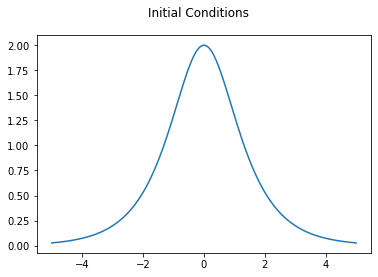

In [3]:
''' ==== h_t = i 0.5 h_xx + i |h|² h ====
'''
L = 10  # [-5, 5]
N = 256+1
dx = L / (N-1)
x = np.arange(-L/2, L/2 + dx, dx)

assert len(x) == N

# frequencies
kappa = 2 * np.pi * np.fft.fftfreq(N, dx)

# initial conditions
h0 = 4 / (np.exp(x) + np.exp(-x))
h0 = h0.astype(np.complex64)

plt.plot(x, h0.real)
plt.suptitle('Initial Conditions')
plt.show()

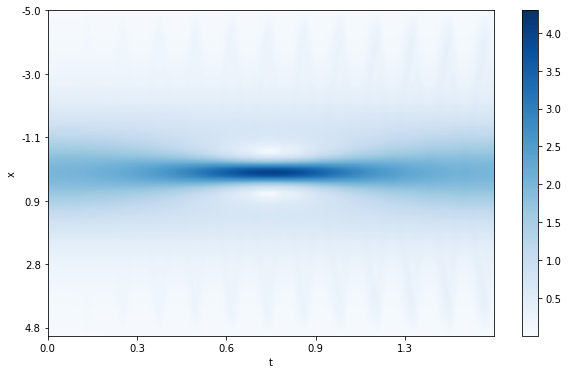

In [5]:
def rhs(t, h):
    hhat = np.fft.fft(h)
    hhat_xx = - kappa * kappa * hhat

    h_xx = np.fft.ifft(hhat_xx)

    return 1j * h_xx / 2 + 1j * h * np.abs(h) ** 2

# simulation setup
# dt = 1e-6 * np.pi / 2  this crashed my laptop
dt = 1e-4 * np.pi / 2
T = np.pi / 2
t = np.arange(0,T,dt)

ivp = solve_ivp(rhs, (0,T), h0, method='RK45', t_eval=t)
h = ivp.y.T

plt.imshow(np.abs(h).T, cmap='Blues', aspect='auto')
plt.colorbar()

plt.xticks(np.arange(h.shape[0])[::2000], [f"{t_i:.1f}" for t_i in t[::2000]])
plt.yticks(np.arange(h.shape[1])[::50], [f"{x_i:.1f}" for x_i in x[::50]])

plt.ylabel('x')
plt.xlabel('t')

plt.gcf().set_size_inches(10,6)

plt.show()